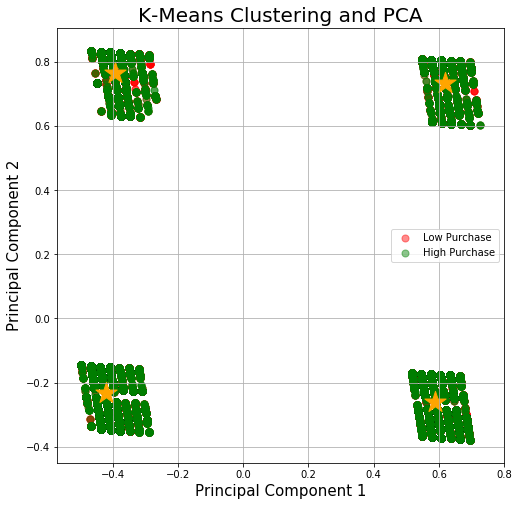



  Evaluation:


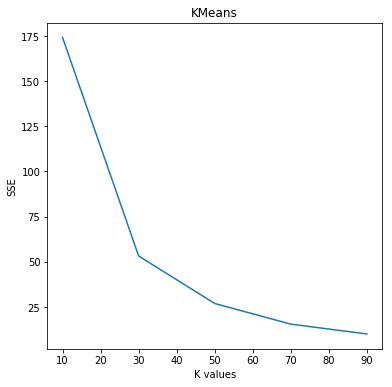

In [3]:
# %load K_meansClustering.py
# Name: Sanchita Kanade
# Red Id: 822108710
# Class: CS653 Data Mining And Knowledge (Spring 2019)
# file: K_meansClustering.py
# Final project 

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from time import time
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# loading data
data = pd.read_csv(r'BlackFriday.csv') 

# randomly selecting 100128 data samples
data = data.sample(100128) 

# transforming Gender attribute values from string to integer form
Gender = data['Gender'].map({'M': 0, 'F': 1}) 

Age = data['Age']

# transforming Age attribute values from string to integer form
Age = Age.map({'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6})

# creating labels 
outputVector = pd.DataFrame(data,columns = ['Purchase'])

##### converting a label vector into binary values based on whether it is larger or smaller than the threshold ####
output = np.zeros(shape=(len(outputVector),1)) 

# threshold is the average of purchases
threshold = np.mean(outputVector['Purchase'])

# converting outputVector into binary values
for i in range(0, len(outputVector)):
    if(outputVector.iloc[i,0] >= threshold):
        output[i] = 1
    else:
        output[i] = 0

occupation = data['Occupation']
Marital_Status = data['Marital_Status']

# creating feature vector
x = np.column_stack((Gender,Age,occupation,Marital_Status))

# Standardizing the features, by normalization procedure
min = np.min(x,0)
max = np.max(x,0)
normed_x = (x - min)/(max - min)

# Using Dimentionality Reduction technique, principal component analysis
pca = PCA(n_components=2)

# creating new feature vector using PCA
featureVector = pca.fit_transform(normed_x)

# applying K_means algorithm for pattern analysis
km_res = KMeans(n_clusters = 4).fit(featureVector)

# collecting cluster centers into variable clusters
clusters = km_res.cluster_centers_

# creating principal data frame for feature vector created by dimentionality reduction  
principalDf = pd.DataFrame(data = featureVector
             , columns = ['principal component 1', 'principal component 2'])

# creating label data frame from output array
labelDf = pd.DataFrame({'Purchase':output.tolist()}) 

# concatinates above two data frames, principal dataframe and label data frame
finalDf = pd.concat([principalDf, labelDf[['Purchase']]], axis = 1)

# plotting results from K_means and principal component analysis
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('K-Means Clustering and PCA', fontsize = 20)

# output vector
targets = [[0.0], [1.0]]
colors = ['r', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = []
    for i in range(0, len(finalDf)):
        # appending true to the indicesToKeep if labels in the final dataframe equal to labels in targets vector
        indicesToKeep.append(finalDf.iloc[i,2] == target)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50,alpha = 0.45)
ax.legend(['Low Purchase','High Purchase'])
ax.scatter(clusters[:,0],clusters[:,1], s = 500,marker="*",c = 'orange')
ax.grid()
plt.show()

# evaluation: calculating sum of square errors for different values of K (number of clusters)
k_values = [10,30,50,70,90]
k_errors = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=5)
    kmeans.fit(featureVector)
    SSE = kmeans.inertia_ 
    k_errors  = np.append(k_errors,SSE)

# plotting a graph of SSE against number of clusters
print("\n\n  Evaluation:")
fig = plt.figure(figsize = (6,6))   
plt.plot(k_values, k_errors)
plt.title("KMeans")
plt.xlabel("K values")
plt.ylabel("SSE")
plt.show()